# Assignment

# Task 1

Chocolate industry is an important industry that supplies. Chocolate industry has a massive potential to expand their industry widely. 
The chocolate retail business depends on knowing what customers like, how products are selling, and what the market wants. With more competition today, chocolate sellers need to use data and make data analysis to make smart decisions that help them earn more and work better to expand their business.

This analysis uses the 'Chocolate_Sales.csv' dataset, which includes detailed information about chocolate sales. For example, product types,sales person's name who sold the chocolates, number of boxes sold, sales revenue, and countries where the sales happened. The main goal is to find patterns and to look for ways to improve chocolate sales.

The following questions will be asked:
- Which chocolate products generate the highest revenue?
- Which countries contribute most to the total sales?
- Do sales vary significantly across different months?
- Are there products that perform significantly better in specific countries?

By answering these questions, this analysis can help improve stock management, create better marketing plans, and track how well the sales team is doing.

# Import Data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Chocolate_Sales.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


# Cleaning Data

In [10]:
df.isnull().sum()
#Since it is zero for every column, therefore there is no empty data

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [11]:
df.duplicated().sum()
#Since there is no duplicated data, therefore there is no need to remove duplicated

0

# Process Data

In [12]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   object        
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 51.4+ KB


C:\Users\juanz\AppData\Local\Temp\ipykernel_11168\1130716863.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [13]:
def removeDollarSign(money):
    return money.replace("$", "").replace(",","")

df["Amount"] = pd.to_numeric(df["Amount"].apply(removeDollarSign))

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   int64         
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 51.4+ KB


# Exploratory Data Analysis (EDA)

### a. The general information about the entire data set Chocolate_Sales.csv 

### b. List the chocolates sold out to India. 

In [15]:
# Find all the name of the chocolates that sold out to India
products = df.loc[df["Country"] == "India"]["Product"]

# Find the name of chocolates
products.unique()

array(['85% Dark Bars', 'Peanut Butter Cubes', 'Smooth Sliky Salty',
       'Fruit & Nut Bars', 'Manuka Honey Choco', 'Spicy Special Slims',
       'Eclairs', 'Almond Choco', '99% Dark & Pure', '50% Dark Bites',
       'Organic Choco Syrup', 'Raspberry Choco', 'Orange Choco',
       'Caramel Stuffed Bars', "Baker's Choco Chips", 'After Nines',
       'Drinking Coco', '70% Dark Bites', 'Milk Bars', 'Mint Chip Choco',
       'Choco Coated Almonds', 'White Choc'], dtype=object)

### c. Identify the salesperson with the highest sales by ranking them based on sales amount. 

In [16]:
df.groupby(["Sales Person"])["Amount"].sum().sort_values(ascending=False)

Sales Person
Ches Bonnell           320901
Oby Sorrel             316645
Madelene Upcott        316099
Brien Boise            312816
Kelci Walkden          311710
Van Tuxwell            303149
Dennison Crosswaite    291669
Beverie Moffet         278922
Kaine Padly            266490
Marney O'Breen         259742
Barr Faughny           258713
Roddy Speechley        251062
Gunar Cockshoot        238483
Gigi Bohling           232666
Karlen McCaffrey       223895
Jehu Rudeforth         220976
Jan Morforth           219667
Curtice Advani         216461
Rafaelita Blaksland    210245
Husein Augar           205212
Andria Kimpton         201747
Mallorie Waber         200592
Camilla Castle         196616
Dotty Strutley         190624
Wilone O'Kielt         138523
Name: Amount, dtype: int64

Ches Bonnell 

### d. Find all sales region or store location where the transaction took place. 


In [17]:
df["Country"].unique()

array(['UK', 'India', 'Australia', 'New Zealand', 'USA', 'Canada'],
      dtype=object)

Smooth Sliky Salty,50% Dark Bites and White Choc

### Which chocolate products generate the highest revenue?

In [35]:
revenue = df[["Product", "Amount"]]
maxRev = revenue.groupby("Product")["Amount"].sum().sort_values(ascending=False)
maxRev.head(3)

Product
Smooth Sliky Salty    349692
50% Dark Bites        341712
White Choc            329147
Name: Amount, dtype: int64

Australia Canada India New Zealand UK USA

### Which countries contribute most to the total sales?

In [40]:
df.head()
countrySales = df.groupby("Country")["Amount"].sum().sort_values(ascending=False)
countrySales.head(3)

Country
Australia    1137367
UK           1051792
India        1045800
Name: Amount, dtype: int64

Australia, UK and India

In [20]:

amountBoxShipped = df[["Amount", "Boxes Shipped"]]
amountBoxShipped.corr()

,Amount,Boxes Shipped
Amount,1.000000,-0.018827
Boxes Shipped,-0.018827,1.000000


### Do sales vary significantly across different months?

In [21]:
df["Month"] = df["Date"].dt.month

In [22]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94,8
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91,7
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342,4
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184,2


In [23]:
amountAccordingMonth = df.groupby(["Month"])["Amount"].sum() 
amountAccordingMonth

Month
1    896105
2    699377
3    749483
4    674051
5    752892
6    865144
7    803425
8    743148
Name: Amount, dtype: int64

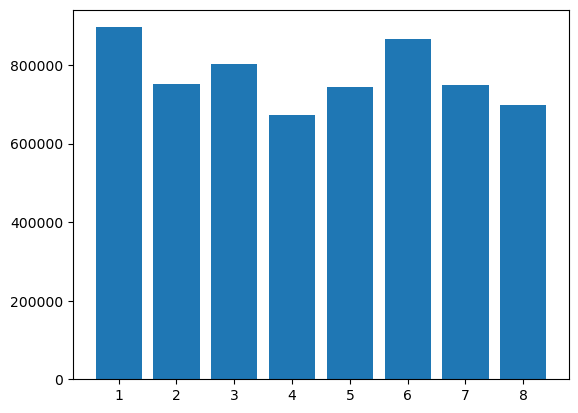

In [43]:
plt.bar(x=df["Month"].unique(), height=amountAccordingMonth)
plt.show()


There is no big difference between each month. Therefore, sales does not vary significantly across different month.